In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_path = "/media/bruno/Arquivos/Desenvolvimento/UBS"
dataset = pd.read_csv(f"{base_path}/data/dataset.csv")

In [3]:
def get_color(key):
    if key == "black":
        return "#808080"
    elif key == "focus":
        return "#f3e79d"

In [14]:
def show_graph_inline(n_content: int, direction: str, title: str, data: list):
    # Configura o conjunto de gráficos
    n_rows, n_columns = (1, n_content) if direction == "horizontal" else (n_content, 1)
    w, h = (40, 15) if direction == "horizontal" else (15, 20)
    fig, ax = plt.subplots(n_rows, n_columns, figsize=(w, h))
    fig.suptitle(title, fontsize=30)

    # Faz a criação de cada gráfico no eixo específico
    for i in range(0, n_content):
        # Cria o gráfico para cada par de categoria-valor
        category_number = [j for j in range(len(data[i]["categories"]))]
        chart = ax[i].barh(category_number, data[i]["values"], color=get_color("black"))
        ax[i].set_yticks(category_number, labels=data[i]["categories"], fontsize=15)
        ax[i].invert_yaxis()

        # Personaliza cada gráfico
        ax[i].set_title(data[i]["title"], pad=10, fontdict={"fontsize": 25})
        ax[i].bar_label(chart, [f"{round(v, 2)}" for v in data[i]["values"]], padding=3, fontsize=15)
        chart[0].set_color(get_color("focus"))
        ax[i].tick_params(axis="x", bottom=False, top=False, labelbottom=False)

    plt.show()

In [17]:
def sort_lists(one: list, two: list):
    for i in range(len(one)):
        for j in range(i, len(one)):
            if one[j] > one[i]:
                one[i], one[j] = one[j], one[i]
                two[i], two[j] = two[j], two[i]

    return [str(c) for c in two], one

In [21]:
def analysis_ubs_uf():
    # Montagem das frequências de UBS para cada estado
    base = dataset.loc[dataset["UF"] != "DF"]
    ufs = list(set(base["UF"].values))
    frequency, per_city = [], []

    for uf in ufs:
        subset = base.loc[base["UF"] == uf]
        cities = set(subset["CITY"].values)
        frequency.append(len(subset))
        per_city.append(len(subset) / len(cities))

    # Faz a ordenação de dados
    cat_frequency = [uf for uf in ufs]
    cat_per_city = [uf for uf in ufs]

    sort_lists(frequency, cat_frequency)
    sort_lists(per_city, cat_per_city)

    # Faz a exibição dos gráficos de distribuição
    data = [
        {"title": "Quantidade de unidades por estado", "categories": cat_frequency, "values": frequency},
        {"title": "Razão de unidades por cidade por estado", "categories": cat_per_city, "values": per_city}
    ]
    show_graph_inline(len(data), "horizontal", "Distribuição das unidades básicas de saúde", data)

In [30]:
def analysis_pop_pib():
    # Faz a avaliação de população e PIB para cada estado
    base = dataset.loc[dataset["UF"] != "DF"]
    ufs = list(set(base["UF"].values))
    pib, pop = [], []

    for uf in ufs:
        subset = base.loc[base["UF"] == uf]
        valid_pop = subset.loc[subset["POPULATION_2021"] != 0]
        valid_pib = subset.loc[subset["PIB_2019"] != 0]

        pop_mean = np.mean(valid_pop["POPULATION_2021"].values)
        pib_mean = np.mean(valid_pib["PIB_2019"].values)

        pop.append(sum(valid_pop["POPULATION_2021"].values) + (len(subset) - len(valid_pop)) * pop_mean)
        pib.append(sum(valid_pib["PIB_2019"].values) + (len(subset) - len(valid_pib)) * pib_mean)

    # Faz a ordenação de dados
    cat_pop = [uf for uf in ufs]
    cat_pib = [uf for uf in ufs]

    sort_lists(pib, cat_pib)
    sort_lists(pop, cat_pop)

    # Reduz a quantidade de casas decimais para exibição
    pop = [round(p / 1000000000, 2) for p in pop]
    pib = [round(p / 10000000000, 2) for p in pib]

    # Faz a exibição dos gráficos de distribuição
    data = [
        {"title": "População por estado (* 10^9)", "categories": cat_pop, "values": pop},
        {"title": "PIB por estado (* 10^10)", "categories": cat_pib, "values": pib}
    ]
    show_graph_inline(len(data), "horizontal", "Alocação de pessoas e riquezas por estado", data)

### Distribuição de unidades básicas de saúde nos estados

O estado de SP lidera isolado a concentração de população o do PIB do país.

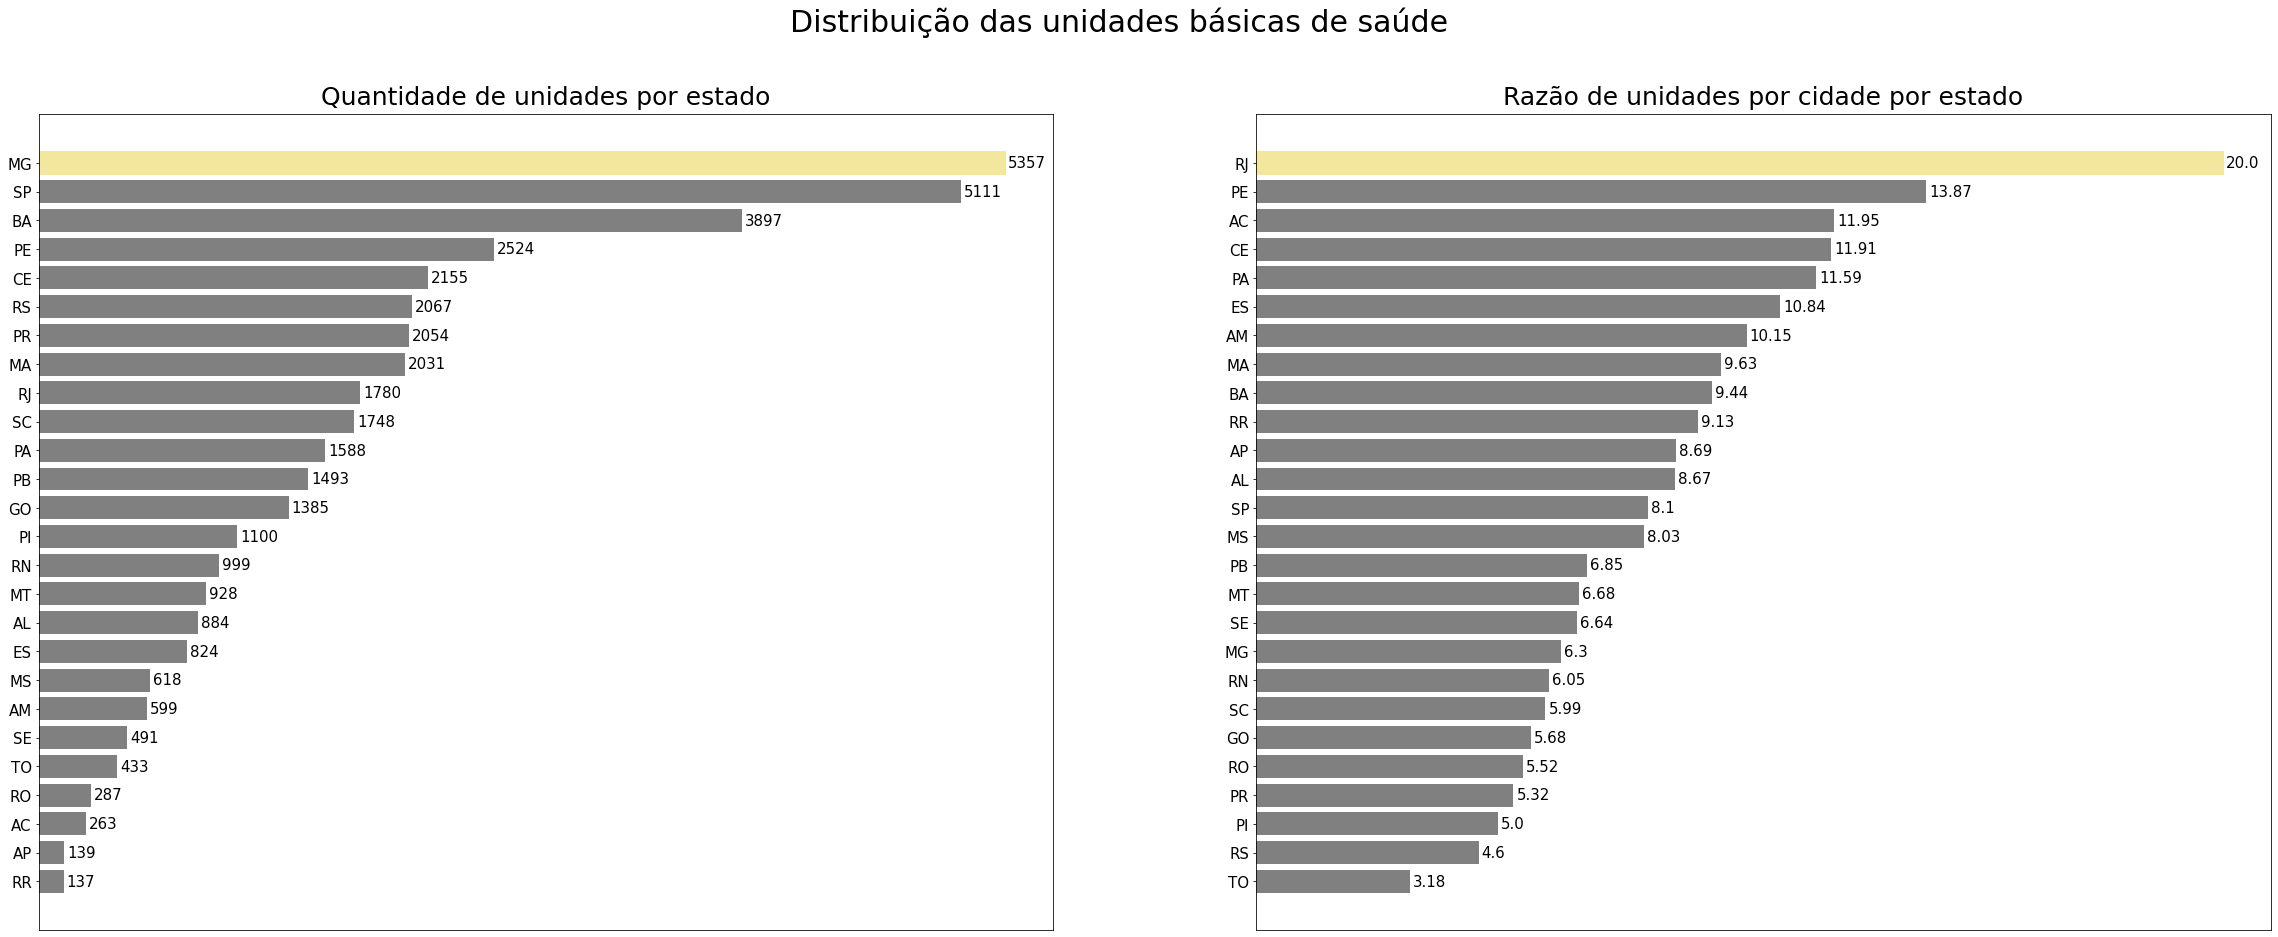

In [22]:
analysis_ubs_uf()

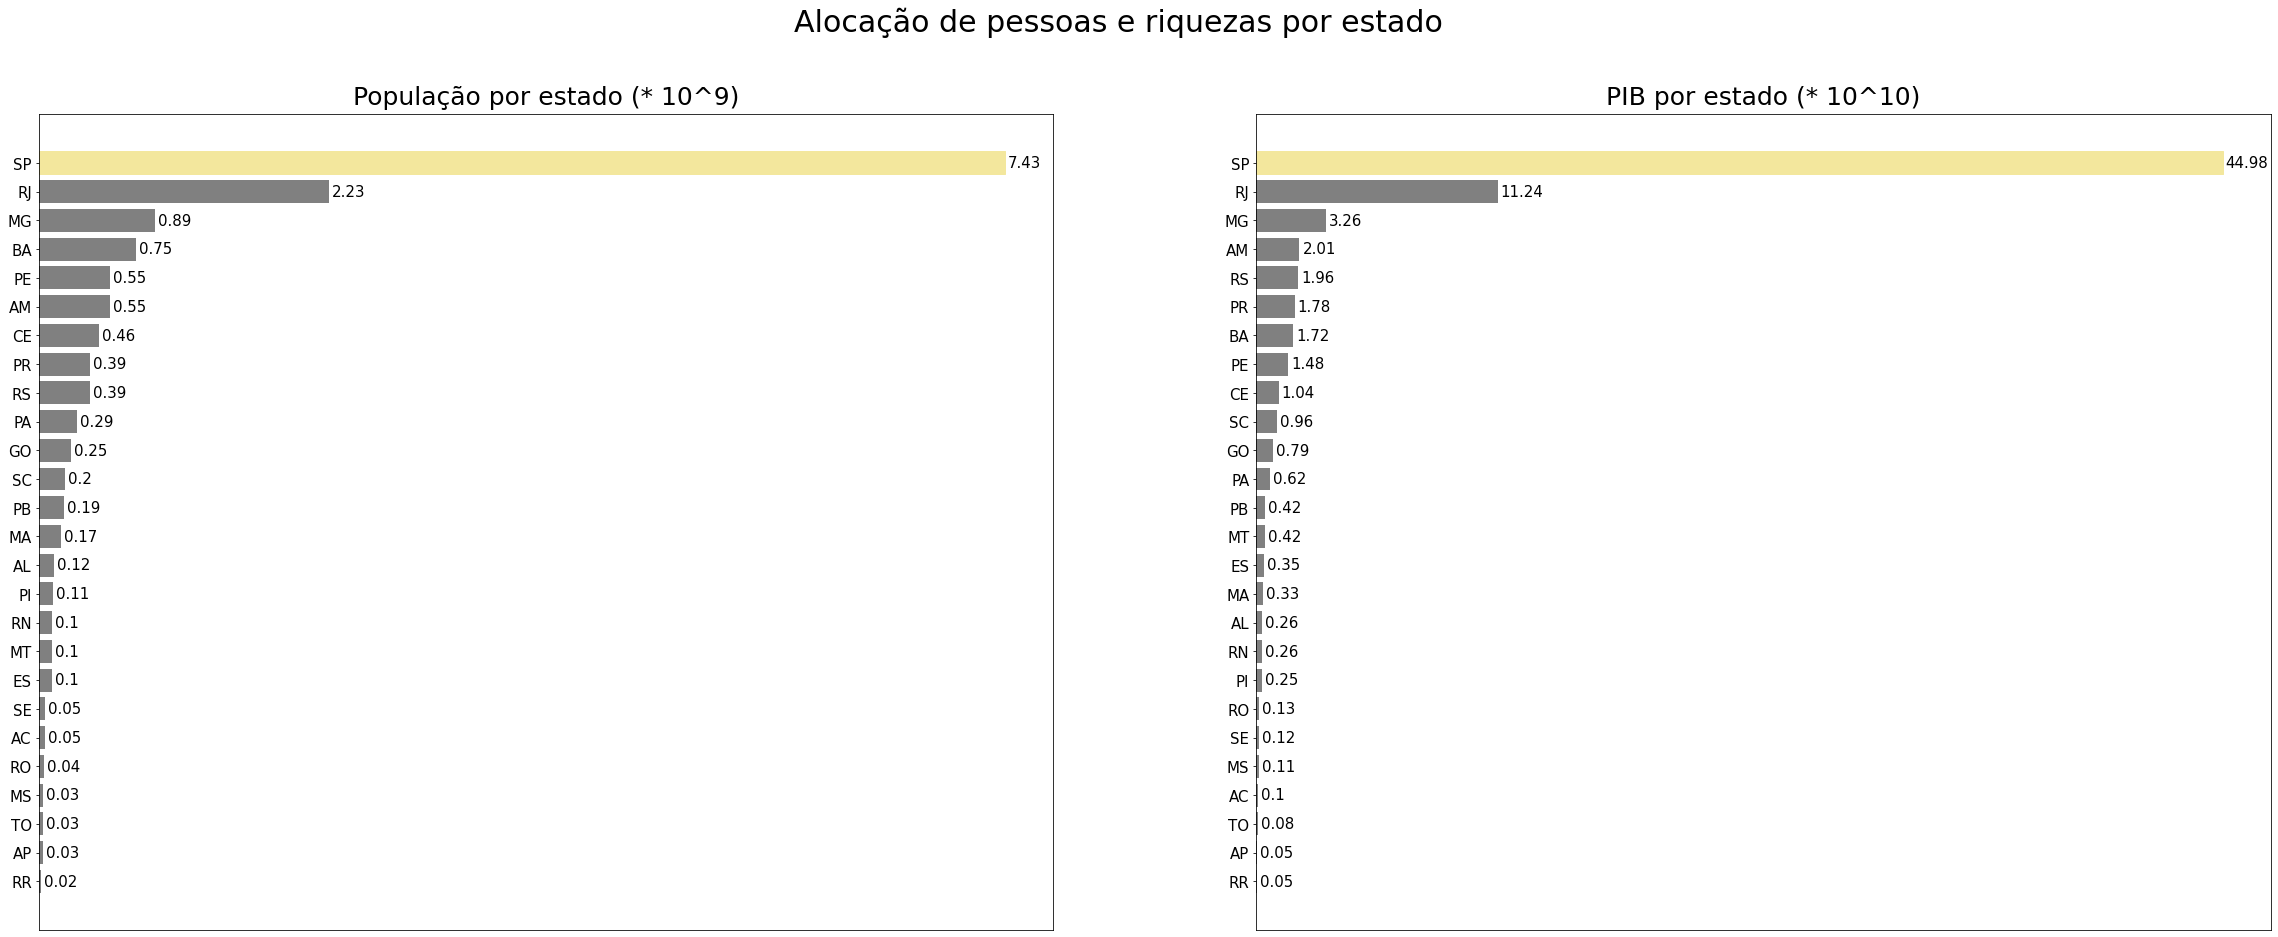

In [31]:
analysis_pop_pib()